In [2]:
import pandas as pd
import numpy as np
import nltk

#### Vader - Variance aware dictionary

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores('i love india')   # it does bot consider check single letter word

C:\Users\lenovo\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [6]:
# {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
# percentage of negative score, percentage of neutral score, percentage of positive score,  percentage of compound score
# anything which is not there in the list is considered as neutral score

In [7]:
sentiment.polarity_scores('I LOVE india')

{'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.7125}

In [15]:
sentiment.polarity_scores('i love india i hate apple')

{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}

In [9]:
# sentence polarity = Total positive score + Total negative score

In [13]:
import math
score = 0.5
alpha = 15
score/math.sqrt((score*score)+alpha)

0.12803687993289598

In [16]:
sentiment.polarity_scores('i love india i hate apple :)')

{'neg': 0.287, 'neu': 0.155, 'pos': 0.558, 'compound': 0.5423}

In [17]:
imdb=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [21]:
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    return 0 if compound < 0 else 1

imdb['vader'] = imdb['review'].apply(get_sentiment)
imdb['vader'].value_counts()

1    489
0    259
Name: vader, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb['sentiment'],imdb['vader'])

0.7767379679144385

In [23]:
## Predicting sentiment for Hotstar Reviews

In [46]:
hotstar=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv')

In [47]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


### Exercise 
- Apply vader package sentiment analyzer to predict sentiment for each review
- from the compound score return the following labels
    - compound > 0.05, return Positive
    - compoung < -0.05, return Negative
    - else return Neutral 
- Calculate the accuracy of the vader package sentiment analyzer using 
  - Sentiment_Manual Column

In [48]:
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

hotstar['vader'] = hotstar['Reviews'].apply(get_sentiment)
hotstar['vader'].value_counts()

Positive    2407
Neutral     1700
Negative     946
Name: vader, dtype: int64

In [53]:

from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'],hotstar['vader'])

0.5503661191371463

In [54]:
pd.crosstab(hotstar['Sentiment_Manual'],hotstar['vader'])

vader,Negative,Neutral,Positive
Sentiment_Manual,,,
Negative,616,540,426
Neutral,248,837,653
Positive,82,323,1328


# Trending of Customer's Sentiment

In [57]:
hotstar['Created_Date'].unique()
hotstar['date'] = pd.to_datetime(hotstar['Created_Date'])
hotstar['date'].min(),hotstar['date'].max()

(Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-13 00:00:00'))

In [58]:
positive_rows = hotstar[hotstar['vader']=='Positive']
negative_rows = hotstar[hotstar['vader']=='Negative']
neutral_rows = hotstar[hotstar['vader']=='Neutral']

positive_rows = positive_rows.groupby('date')['vader'].count()
negative_rows = negative_rows.groupby('date')['vader'].count()
neutral_rows = neutral_rows.groupby('date')['vader'].count()




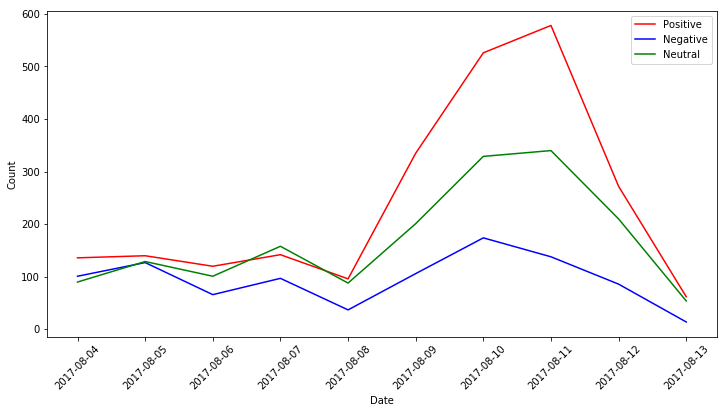

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(positive_rows,color='r',label='Positive')
plt.plot(negative_rows,color='b',label='Negative')
plt.plot(neutral_rows,color='g',label='Neutral')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Amazon Reviews - topic modelling

In [3]:
amazon=pd.read_csv('amazon_reviews_big.csv')
amazon.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [4]:
amazon.shape

(100000, 8)

In [7]:
!pip install gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\lenovo\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\lenovo\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import gensim

In [5]:
docs=amazon['reviewText'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head(1)

0    what i recieved is not what is pictured here o...
Name: reviewText, dtype: object

In [35]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [22]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [23]:
dictionary.token2id['tablet']

1123

In [24]:
list(dictionary.values())

['advert',
 'amazoncom',
 'anyth',
 'attempt',
 'back',
 'bait',
 'buy',
 'cabl',
 'cheap',
 'claim',
 'contact',
 'els',
 'enough',
 'find',
 'flimsi',
 'full',
 'give',
 'gold',
 'grade',
 'high',
 'im',
 'item',
 'job',
 'kareoke',
 'know',
 'list',
 'look',
 'mistak',
 'need',
 'order',
 'pictur',
 'plate',
 'product',
 'qualiti',
 'reciev',
 'refund',
 'run',
 'seller',
 'sender',
 'sent',
 'still',
 'surpris',
 'switch',
 'thin',
 'thing',
 'told',
 'tv',
 'vidio',
 'wife',
 'woth',
 'would',
 'adapt',
 'also',
 'anoth',
 'bend',
 'bode',
 'car',
 'cd',
 'correctli',
 'dash',
 'easi',
 'even',
 'evid',
 'excel',
 'extra',
 'fit',
 'frame',
 'front',
 'futur',
 'get',
 'ill',
 'instal',
 'installjust',
 'isnt',
 'kenwood',
 'like',
 'mark',
 'miata',
 'mine',
 'next',
 'player',
 'pretti',
 'purchas',
 'radio',
 'realli',
 'remov',
 'report',
 'sharpi',
 'simpl',
 'simpler',
 'skipfre',
 'slide',
 'snugli',
 'sound',
 'sport',
 'stuff',
 'sure',
 'tab',
 'time',
 'today',
 'tool',

In [10]:
list(dictionary.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [21]:
list(zip(dictionary.keys(),dictionary.values()))

[(0, ''),
 (1, 'advert'),
 (2, 'amazoncom'),
 (3, 'anyth'),
 (4, 'attempt'),
 (5, 'back'),
 (6, 'bait'),
 (7, 'buy'),
 (8, 'cabl'),
 (9, 'cheap'),
 (10, 'claim'),
 (11, 'contact'),
 (12, 'els'),
 (13, 'enough'),
 (14, 'find'),
 (15, 'flimsi'),
 (16, 'full'),
 (17, 'give'),
 (18, 'gold'),
 (19, 'good'),
 (20, 'grade'),
 (21, 'high'),
 (22, 'im'),
 (23, 'item'),
 (24, 'job'),
 (25, 'kareoke'),
 (26, 'know'),
 (27, 'list'),
 (28, 'look'),
 (29, 'mistak'),
 (30, 'need'),
 (31, 'order'),
 (32, 'pictur'),
 (33, 'plate'),
 (34, 'product'),
 (35, 'qualiti'),
 (36, 'reciev'),
 (37, 'refund'),
 (38, 'run'),
 (39, 'seller'),
 (40, 'sender'),
 (41, 'sent'),
 (42, 'still'),
 (43, 'surpris'),
 (44, 'switch'),
 (45, 'thin'),
 (46, 'thing'),
 (47, 'told'),
 (48, 'tv'),
 (49, 'vidio'),
 (50, 'wife'),
 (51, 'woth'),
 (52, 'would'),
 (53, 'adapt'),
 (54, 'also'),
 (55, 'anoth'),
 (56, 'bend'),
 (57, 'bode'),
 (58, 'car'),
 (59, 'cd'),
 (60, 'correctli'),
 (61, 'dash'),
 (62, 'easi'),
 (63, 'even'),
 (64,

In [25]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [24]:
dictionary.doc2bow(docs_clean[0])

[(0, 5),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 5),
 (9, 1),
 (10, 1),
 (11, 3),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 2),
 (37, 2),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1)]

In [26]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4,random_state=100)


In [27]:
lda_model.get_topic_terms(1)

[(788, 0.008832706),
 (271, 0.008377768),
 (142, 0.0073240125),
 (103, 0.0070591513),
 (28, 0.0067013893),
 (7, 0.006250729),
 (50, 0.005924775),
 (69, 0.005814362),
 (211, 0.005750574),
 (75, 0.005366911)]

In [28]:
# to calc time
%timeit lda_model

27 ns ± 0.0373 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Document to topic Relationship

In [29]:
lda_model.get_document_topics(docs_bow[0])

[(2, 0.9874226)]

In [30]:
df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
df.sort_values(by='probs').iloc[-1]['topics']

1.0

In [31]:
topics=[]
for doc in docs_bow:
    df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
amazon['topics']=topics

# Topic to Term's Relationship

In [32]:
lda_model.print_topics()

[(0,
  '0.014*"case" + 0.012*"work" + 0.008*"like" + 0.008*"great" + 0.008*"use" + 0.007*"would" + 0.006*"keyboard" + 0.006*"screen" + 0.006*"well" + 0.006*"get"'),
 (1,
  '0.009*"drive" + 0.008*"work" + 0.007*"great" + 0.007*"use" + 0.007*"need" + 0.006*"cabl" + 0.006*"would" + 0.006*"get" + 0.006*"camera" + 0.005*"like"'),
 (2,
  '0.014*"work" + 0.010*"batteri" + 0.009*"get" + 0.009*"cabl" + 0.008*"great" + 0.007*"speaker" + 0.007*"len" + 0.007*"use" + 0.006*"camera" + 0.006*"sound"'),
 (3,
  '0.007*"camera" + 0.007*"work" + 0.007*"like" + 0.007*"get" + 0.007*"use" + 0.006*"sound" + 0.006*"time" + 0.005*"card" + 0.005*"video" + 0.005*"would"')]

# Exercise:

### Apply topic modelling to cluster news based on their headlines.randomly select 100000 rows

In [41]:
news=pd.read_csv('abcnews.csv').sample(100000)

In [42]:
news.head()

,publish_date,headline_text
182669,20050817,passenger thrown out and run over
246084,20060629,action group scores saleyards win
883813,20140619,former bangladesh captain ashraful given eight...
686961,20120412,group slams govt as chinese nationals seek asylum
429177,20081208,jury discharged in robbery trial


In [44]:
docs=news['headline_text'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head(1)

182669    passenger thrown out and run over
Name: headline_text, dtype: object

In [45]:
stopwords=nltk.corpus.stopwords.words('english')
#stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [46]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [47]:
dictionary.token2id['tablet']

4731

In [48]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [54]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=5,random_state=100,iterations=300)


In [55]:
df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
df.sort_values(by='probs').iloc[-1]['topics']

2.0

In [56]:
topics=[]
for doc in docs_bow:
    df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
news['topics']=topics

In [57]:
lda_model.print_topics()

[(0,
  '0.028*"" + 0.008*"interview" + 0.006*"say" + 0.005*"new" + 0.005*"win" + 0.004*"countri" + 0.004*"pm" + 0.004*"water" + 0.004*"call" + 0.003*"flood"'),
 (1,
  '0.008*"say" + 0.007*"govt" + 0.007*"new" + 0.006*"plan" + 0.005*"back" + 0.005*"australia" + 0.004*"take" + 0.004*"market" + 0.004*"us" + 0.004*"lead"'),
 (2,
  '0.008*"call" + 0.006*"health" + 0.006*"death" + 0.005*"polic" + 0.005*"claim" + 0.005*"warn" + 0.004*"chang" + 0.004*"man" + 0.004*"attack" + 0.004*"hospit"'),
 (3,
  '0.014*"polic" + 0.011*"man" + 0.011*"" + 0.008*"kill" + 0.008*"charg" + 0.006*"court" + 0.006*"fire" + 0.006*"crash" + 0.005*"new" + 0.005*"car"')]

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

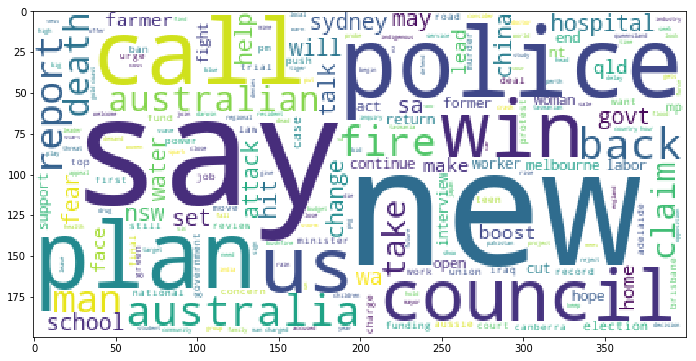

In [64]:
plt.figure(figsize=(12,6))
text=' '.join(news['headline_text'])
wc=WordCloud(background_color='white').generate(text)
plt.imshow(wc)
plt.show()

In [67]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [69]:

c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=5,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

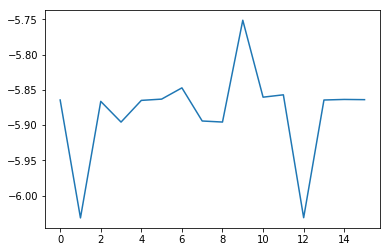

In [70]:
plt.plot(c_scores)
plt.show()